# 1.관련 패키지 설치하기

In [1]:
!pip install kiwipiepy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install Pillow --upgrade
!pip install numpy
!pip install xlrd
!pip install openpyxl
!pip install pandas
!pip install nltk

# 2.단어 온톨로지 사전 불러오기

In [2]:
import pandas as pd
df_dic = pd.read_excel('./data/ontology/ontology.xlsx')
# C:\Users\채가은\Downloads\BDA2023\BDA2023\data\ontology
print(df_dic[:100])

    단어 클래스
0   강의  강의
1   수업  강의
2   내용  강의
3   교양  강의
4   재밌  강의
..  ..  ..
95  과제  과제
96  대체  과제
97  발표  과제
98  팀플  과제
99  제출  과제

[100 rows x 2 columns]


In [3]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
wordList = df_dic.loc[:,["단어"]]
wordType = set()

wordsPOS = []
for i in range(0,len(wordList)):
    classWords = str(df_dic.loc[i,"클래스"])
    wordType.add(str(classWords))
    target = wordList.iloc[i,0]
    posTagout = kiwi.tokenize(target)
    # print(posTagout)
    wordPOS = ""
    for eachOut in posTagout:
        result = eachOut[0]+"/"+eachOut[1]
        wordPOS = result
        break
    wordPOS = wordPOS.strip()
    wordsPOS.append(wordPOS)
print(wordsPOS[:10])
print(wordType)

['강의/NNG', '수업/NNG', '내용/NNG', '교양/NNG', '재밌/VA', '과목/NNG', '학기/NNG', '추천/NNG', '사람/NNG', '배우/NNG']
{'교수', '과제', '강의', '시험', '성적'}


In [4]:
df_dic['품사태깅'] = wordsPOS
classWords = list(wordType)
print(df_dic[:100])
print(classWords)

    단어 클래스    품사태깅
0   강의  강의  강의/NNG
1   수업  강의  수업/NNG
2   내용  강의  내용/NNG
3   교양  강의  교양/NNG
4   재밌  강의   재밌/VA
..  ..  ..     ...
95  과제  과제  과제/NNG
96  대체  과제  대체/MAG
97  발표  과제  발표/NNG
98  팀플  과제  팀플/NNG
99  제출  과제  제출/NNG

[100 rows x 3 columns]
['교수', '과제', '강의', '시험', '성적']


In [5]:
#감정들이 가지고 있는 단어 목록 확인하기
ontologyDic = {}
for eachClass in classWords:
    ontologyDic[eachClass] = list(df_dic[df_dic.클래스==eachClass]['품사태깅'])
    print(eachClass)
    print(list(df_dic[df_dic.클래스==eachClass]['품사태깅']))
print(ontologyDic)

교수
['교수/NNG', '말/NNG', '친절/NNG', '질문/NNG', '열정/NNG', '설명/NNG', '말씀/NNG', '피드백/NNG', '배려/NNG', '의견/NNG', '가르치/VV', '이야기/NNG', '공지/NNG', '따라가/VV', '착하/VA', '얘기/NNG', '소통/NNG', '목소리/NNG', '감사/NNG', '주관/NNG', '천사/NNG', '존중/NNG', '적극/NNG', '열의/NNG', '성격/NNG', '메일/NNG', '강노/NNP', '사랑/NNG', '느리/VA', '갓/MAG']
과제
['과제/NNG', '대체/MAG', '발표/NNG', '팀플/NNG', '제출/NNG', '토론/NNG', '조/NNP', '보고서/NNG', '매주/MAG', '개인/NNG', '팀/NNG', '레포트/NNG', '주제/NNG', '프로젝트/NNG', '에세이/NNG', '감상문/NNG', '페이지/NNG', '팀원/NNG', '조별/NNG', '모임/NNG', '비평/NNG', '조원/NNG', '기획/NNG', '계획서/NNG', '서평/NNG', '활동/NNG']
강의
['강의/NNG', '수업/NNG', '내용/NNG', '교양/NNG', '재밌/VA', '과목/NNG', '학기/NNG', '추천/NNG', '사람/NNG', '배우/NNG', '모르/VV', '관심/NNG', '이해/NNG', '꿀/NNG', '본인/NNG', '수강/NNG', '흥미/NNG', '자신/NNG', '재미있/VA', '역사/NNG', '철학/NNG', '괜찮/VA', '지식/NNG', '신청/NNG', '좋아하/VV', '만족/NNG', '도움/NNG', '전공/NNG', '대학/NNG', '최고/NNG', '문학/NNG', '계절/NNG', '인생/NNG', '아쉽/VA-I', '관점/NNG', '걱정/NNG', '단점/NNG', '빡세/VA', '학교/NNG', '피하/NNG', '졸업/NNG', '인정/NNG', '아주대/NN

In [6]:
#단어-감정 사전 만들기
wordOntologyDic = {}
for i in range(0,len(df_dic)):
    wordOntologyDic[df_dic.loc[i,"품사태깅"]] = df_dic.loc[i,"클래스"]
print(wordOntologyDic)

{'강의/NNG': '강의', '수업/NNG': '강의', '내용/NNG': '강의', '교양/NNG': '강의', '재밌/VA': '강의', '과목/NNG': '강의', '학기/NNG': '강의', '추천/NNG': '강의', '사람/NNG': '강의', '배우/NNG': '강의', '모르/VV': '강의', '관심/NNG': '강의', '이해/NNG': '강의', '꿀/NNG': '강의', '본인/NNG': '강의', '수강/NNG': '강의', '흥미/NNG': '강의', '자신/NNG': '강의', '재미있/VA': '강의', '역사/NNG': '강의', '철학/NNG': '강의', '괜찮/VA': '강의', '지식/NNG': '강의', '신청/NNG': '강의', '좋아하/VV': '강의', '만족/NNG': '강의', '도움/NNG': '강의', '전공/NNG': '강의', '대학/NNG': '강의', '최고/NNG': '강의', '문학/NNG': '강의', '계절/NNG': '강의', '인생/NNG': '강의', '아쉽/VA-I': '강의', '관점/NNG': '강의', '걱정/NNG': '강의', '단점/NNG': '강의', '빡세/VA': '강의', '학교/NNG': '강의', '피하/NNG': '강의', '졸업/NNG': '강의', '인정/NNG': '강의', '아주대/NNP': '강의', '수학/NNG': '강의', '이과/NNG': '강의', '온라인/NNG': '강의', '아깝/VA-I': '강의', '싫/VA': '강의', '미술/NNG': '강의', '기회/NNG': '강의', '필수/NNG': '강의', '추가/NNG': '강의', '지각/NNG': '강의', '줌/MAG': '강의', '정치/NNG': '강의', '장점/NNG': '강의', '언어/NNG': '강의', '새롭/VA-I': '강의', '문과/NNG': '강의', '따라가/VV': '교수', '고전/NNG': '강의', '고등학교/NNG': '강의', '학습/NNG'

# 3. 말뭉치 데이터 불러오기

In [7]:
# 데이터 불러오기
import re

fileDir = "./data/Social.txt"
fr = open(fileDir, 'rt', encoding='UTF8')
contents = fr.readlines()
fr.close()

reviewList = []
for content in contents:
    content = re.sub('[^가-힣]', ' ', content).replace("\n","")
    content = re.sub('[\s]+', ' ', content).strip()
    if content == "" or content == " ":
        pass
    else:
        reviewList.append(content)

for eachReview in reviewList:
    print(eachReview)

수업 자체가 어려워 보이지만 수강생들의 입장에서 알기 쉽게 설명해주심
늘 주관식이었어서 소스가 다 주관식소스뿐임 부터 객시험이라는데 객소스 없으니까 헛수고 본인은 학점따기위해 수강해서 수업안들음 진도만 체크해놓고 셤기간에 책읽고 소스문제 풀어봄 소스안풀었으면 어려웠을듯 소스 말만 좀 바꾸고 비슷해서 에쁠먹고검
사례를 통해 설명을 해주셔서 더 이해가 잘 가서 좋아용
세 상에 이 런 법이 어딨느냐 살면서 부당한 일을 당한다면 도움 될 거 같은 내용 많이 배우고 재밌어요
배울 것도 많고 정말 재미있게 들었던 수업이었습니다 법에 대해 하나도 몰랐지만 사례와 함께 설명을 해 주셔서 전혀 어려움 없이 들을 수 있었고 수업을 잘 듣는 게 무엇보다 중요한 것 같습니다
강의가 재밌음 대신 대면 되면서 소스 없이 셤보면 빡셈
책에 있는 사례 위주로 수업해서 어렵지 않고 재밌게 들을 수 있었습니다 수업시간에 열심히 듣고 필기 열심히 하면 시험은 쉽게 보실 수 있습니다 시험은 객관식인데 꼼꼼히 공부 안하시면 은근 헷갈릴 수도 있을 것 같아요 다들 열심히 하는 느낌이라 시험 잘 보셔야 좋은 학점 받아요
설명을 너무 잘해주셔서 법이지만 재밌게 들었습니다 교수님 말씀만 제대로 필기해놓고 시험전에 두세번 읽으면 중간 기말 만점 나옵니다
아니 이거마저 소스 과목이였어 점수분포 상당허네 게다가 성적은 뭐가 널널 걍 여타 과목들이랑 다를게 없는데
특허나 저작권에 관한 법 공부를 할 수 있는 교양 편하게 듣기에 최고였다
수업만 열심히 들어도 가능한 과목 수업도 재밌고 반복해주시는것도 있고 중요한건 짚어주시기에 강의듣고 책 필기하고 복습하면 기말 준비 끝 중간은 레포트
강의만 잘 들으면 됩니다 교수님이 말씀하신것만 시험에 나와요 내용도 흥미롭고 학점도 너그러워요 짱
정말 안들으면 후회합니다 배워가는 게 정말 많았습니다 교양 중 단연 최고라 할 수 있을 것 같습니다 딱 하나였고 그것 조차 보충자료에 불과했습니다 교수님의 설명으로 전부다 이해됐습니다 과제 없었습니다 그냥 수업시간에만 열심히 들으세요 

In [10]:
from kiwipiepy import Kiwi
import re

kiwi = Kiwi()
#품사태깅된 문장
reviewPOSList = []
#단어의 타입 확인
wordType = set()
sentencePOSAll = []
sentencePOSContent = []
sentencePOSTextAll = ""


for eachReview in reviewList:
    #띄어쓰기
    eachReviewSpace = kiwi.space(eachReview)
    #문장 분할
    eachReviewSpaceSentences = kiwi.split_into_sents(eachReviewSpace)
    for sentence in eachReviewSpaceSentences:
        content = sentence.text
        #품사태깅
        posTagout = kiwi.tokenize(content)
        sentencePOS = ''
        for eachOut in posTagout:
            if "VV" in eachOut[1] or "VA" in eachOut[1] or "NN" in eachOut[1] or "MA" in eachOut[1]:
                resultContent = eachOut[0] + "/" + eachOut[1]
                sentencePOSContent.append(resultContent)
                
                result = eachOut[0] + "/" + eachOut[1]
            sentencePOS = sentencePOS + " " + result
            sentencePOSAll.append(result)
            if result != "":
                wordType.add(result)
            sentencePOSTextAll = sentencePOSTextAll + " " + eachOut[0]
        sentencePOS = sentencePOS.strip()
#         sentencePOSAll = sentencePOSAll + " " + sentencePOS
        reviewPOSList.append(sentencePOS)

sentencePOSTextAll = sentencePOSTextAll.strip()

print(sentencePOSContent[:20])
print(sentencePOSAll[:20])
print(wordType)
print(len(wordType))
print(reviewPOSList[:10])
print(len(reviewPOSList))

['수업/NNG', '자체/NNG', '어렵/VA-I', '보이/VV', '수강/NNG', '입장/NNG', '알/VV', '쉽/VA-I', '설명/NNG', '늘/MAG', '주관식/NNG', '소스/NNG', '다/MAG', '주관식/NNG', '소스/NNG', '객/NNG', '시험/NNG', '객/NNG', '소스/NNG', '없/VA']
['수업/NNG', '자체/NNG', '자체/NNG', '어렵/VA-I', '어렵/VA-I', '보이/VV', '보이/VV', '수강/NNG', '수강/NNG', '수강/NNG', '수강/NNG', '입장/NNG', '입장/NNG', '알/VV', '알/VV', '쉽/VA-I', '쉽/VA-I', '설명/NNG', '설명/NNG', '설명/NNG']
{'답안/NNG', '까먹/VV', '소감/NNG', '대개/NNG', '영어/NNP', '지나치/VA', '뜨/VV', '외국어/NNG', '어/NNG', '잘못/NNG', '국가/NNG', '깊이/NNG', '얕/VA', '후기/NNG', '무적/NNG', '일/NNG', '어려움/NNG', '남순강화/NNP', '빼먹/VV', '뒤집/VV-R', '넘어가/VV', '대략/MAG', '마인드/NNG', '지식/NNG', '타이핑/NNG', '일으키/VV', '회의실/NNG', '대/VV', '어쩌/VV', '몫/NNG', '힘듦/NNG', '싫어하/VV', '체험학습/NNP', '중국어/NNP', '날로/MAG', '이유/NNG', '상관없이/MAG', '규/NNG', '비비/MAG', '법/NNG', '우편/NNG', '다방면/NNG', '주입식/NNG', '명/NNG', '단체/NNG', '도움/NNG', '전반/NNG', '원인/NNG', '공감/NNG', '근데/MAJ', '이미/MAG', '부랄/NNP', '많/VA', '요약/NNG', '최소/NNG', '헌/NNG', '낚시/NNG', '덤/NNG', '자극/NNG', '제한/NNG', '가요/NNG', '

# 4. 말뭉치 사용 빈도 기반 시각화 하기

## 4-1 전체 데이터 사용하기

<Axes: xlabel='n', ylabel='word'>

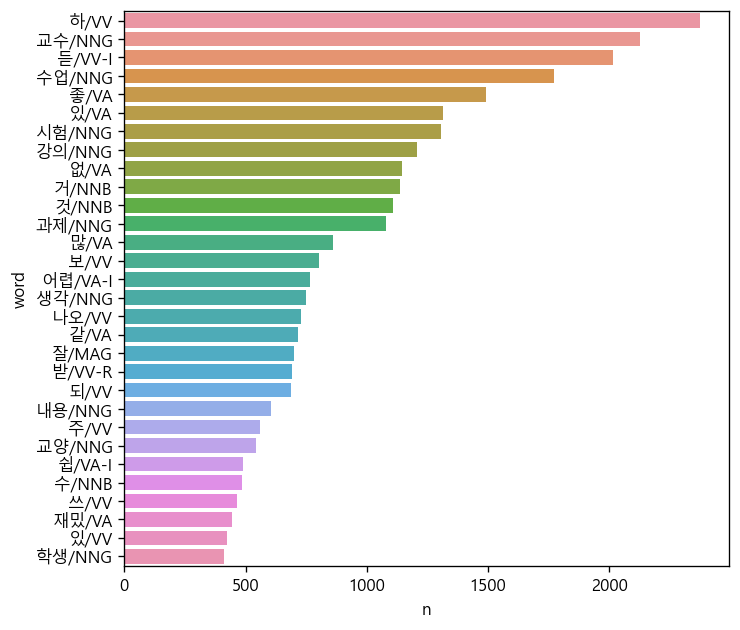

In [11]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSAll})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

#plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')


In [12]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = './data/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 4-2 문맥 단어만 사용하기

<Axes: xlabel='n', ylabel='word'>

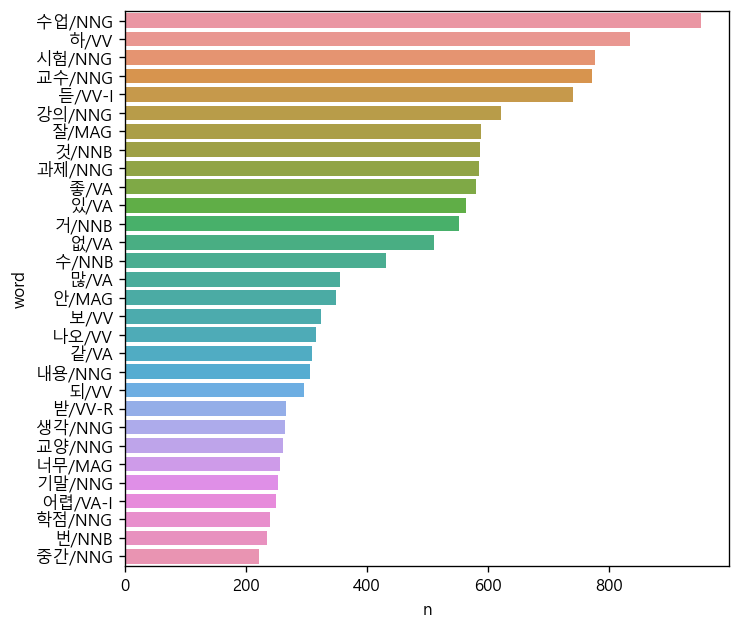

In [13]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSContent})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')

In [14]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = './data/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 4-3 문맥 안에서 단어 사용 확인하기

In [15]:
from nltk import *
retokenize = RegexpTokenizer("[\w]+")
text = Text(retokenize.tokenize(sentencePOSTextAll))
text.concordance("강의")

Displaying 25 of 622 matches:
고 수업 을 잘 듣 는 것 이 무엇 보다 중요 하 ᆫ 것 같 습니다 강의 가 재밌 음 대신 대 면 되 면서 소스 없이 셤 보 면 빡세 ᆷ 책
 주 시 는 것 도 있 고 중요 하 ᆫ 거 ᆫ 짚 어 주 시 기 에 강의 듣 고 책 필기 하 고 복습 하 면 기말 준비 끝 중간 은 레포트 
 듣 고 책 필기 하 고 복습 하 면 기말 준비 끝 중간 은 레포트 강의 만 잘 듣 으면 되 ᆸ니다 교수 님 이 말씀 하 시 ᆫ 것 만 시험
 ᆫ 만큼 지식 이랑 학점 둘 다 얻 어 가 ᆯ 수 있 는 최고 의 강의 이 ᆷ 강추 갓 헌 교수 님 내용 도 몇 번 씩 반복 하 면서 초등
 사이 에 숨 쉬 ᆯ 수 있 는 영 교과목 일 주일 에 두 번 녹화 강의 올라오 는데 편안 하 ᆫ 마음 으로 듣 으면 되 ᆫ다 시험 도 어렵
 도 어렵 지 않 었 음 최고 의 날먹영교 시험 치 기 하루 전 에 강의 몰 어 듣 고 시험 치 어서 에쁠 굿 최고 이 ᆸ니다 중간 기말 출
어서 에쁠 굿 최고 이 ᆸ니다 중간 기말 출석 이내 감점 이 ᆸ니다 강의 일주일 개 녹 강 이 ᆫ데 강의 만 성실 하 게 보 어도 당신 은 
간 기말 출석 이내 감점 이 ᆸ니다 강의 일주일 개 녹 강 이 ᆫ데 강의 만 성실 하 게 보 어도 당신 은 중간 대체 과제 기말 비 대면 캠
 기말고사 는 시험 이 ᆫ데 시간 제 하 ᆫ 온라인 시험 이 었 다 강의 듣 다 보 면 법 에 크 ᆫ 관심 없 어도 은근 유용 하 ᆫ 것 이
보 면 법 에 크 ᆫ 관심 없 어도 은근 유용 하 ᆫ 것 이 많 다 강의 잘 듣 고 정리 하 어 두 면 에이 권 은 가능 하 ᆯ 듯 과제 없
내 면 출석 인정 하 어 주 시 어서 진짜 다행 이 었 음 시험 도 강의 만 열심히 듣 으면 진짜 쉽 음 시험 은 중간 기말 있 는 데 수업
ᆫ데 에이플 잘 받 어 가 ᆸ니다 말 이 필요 없 는 최고 의 교양 강의 법 에 대하 어도 모르 어도 충분히 쉽 게 이해 하 ᆯ 수 있 음 
분 하 지만 그나마 쉽 고 간단히 설명 

In [16]:
text.concordance("성적")

Displaying 25 of 181 matches:
아니 이거 마저 소스 과목 이 였 어 점수 분포 상당 허 네 게다가 성적 은 뭐 가 널널 걍 여타 과목 들 이랑 다르 ᆯ 것 이 없 는 데 
시 고 시험 도 수업 잘 듣 었 으면 무난 하 게 풀 만 하 ᆸ니다 성적 도 잘 주 시 는 편 이 ᆫ 듯 하 네요 너무 실용 적 이 ᆫ 내용
 과제 가 없 는 거 ᆫ 덤 이 고 시험 난이도 도 괜찮 음 게다가 성적 도 푸 어 주 ᆷ 갓 헌 교수 님 다 녹 강 에 시험 두 번 중간고
 듣 었 어요 좋 은 강의 이 ᆸ니다 쉽 게 알리 어 주 시 ᆸ니다 성적 도 잘 주 시 ᆸ니다 교수 님 너무 좋 습니다 중간 고사 기말 고사
오 ᆫ 거 보 면 포기 하 ᆫ 사람 이 많 음 공부 하 ᆫ 거 대비 성적 잘 나오 는 과목 이 ᆫ 듯 교수 님 성격 도 착하 시 ᆷ 공대 교
음 출석 잘 하 고 수업 시간 에 필기 잘 하 시 면 무난히 좋 은 성적 받 을 수 있 어요 소스 를 가지 고 있 으면 더 안정 적 으로 좋
을 수 있 어요 소스 를 가지 고 있 으면 더 안정 적 으로 좋 은 성적 보장 가능 아주대 년 다니 면서 듣 은 교양 중 최고 명 강 의 개
인가 받 고 받 었 습니다 딱히 기출 없이 필기 만 열심히 하 어도 성적 잘 받 을 수 있 는 과목 이 ᆫ 것 같 어요 지금 까지 듣 은 교
 지만 어렵 지 ᆫ 않 음 수업 시간 에 잘 듣 으면 충분히 좋 은 성적 가능 하 ᆷ 갓 헌 교수 님 너무 재밌 으시 고 사례 중심 이 라 
 잘 듣 고 필기 잘 하 면 시험 은 굉장히 쉽 게 느끼 어 지 고 성적 도 잘 나오 ᆸ니다 수업 도 재미있 어요 과제 없 고 팀플 없 어서
험 만 두 번 딱 보 는데 고 학번 이 많 어서 한두 문제 차이 로 성적 갈리 어요 법 이 지만 교수 님 이 너무 재밌 게 수업 하 시 어서
가 없 는 강의 이 라 보 ᆫ 수업 공부 에 만 충실 하 면 좋 은 성적 받 을 수 있 어요 교수 님 이 진짜 재밌 으시 고 좋 어요 수업 
 이 에요 사람 들 다 들 열심히 하 ᆷ

In [17]:
text.concordance("과제")

Displaying 25 of 585 matches:
 하 었 습니다 교수 님 의 설명 으로 전부 다 이해 되 었 습니다 과제 없 었 습니다 그냥 수업 시간 에 만 열심히 듣 으세요 수업 시간 
 도 어렵 지 않 어 가볍 게 듣 을 수 있 음 중요 하 ᆫ 거 ᆫ 과제 도 없 음 시험 도 적당 하 ᆫ 난이도 로 나오 어서 에이플 받 어
이 ᆷ 수업 도 학생 들 의견 반영 하 시 어서 풀 비 대면 실 강 과제 도 없 고 중간 대체 과제 랑 기말 대 면 시험 보 었 음 수업 제
견 반영 하 시 어서 풀 비 대면 실 강 과제 도 없 고 중간 대체 과제 랑 기말 대 면 시험 보 었 음 수업 제대로 듣 고 좀 만 공부 하
 녹 강 이 ᆫ데 강의 만 성실 하 게 보 어도 당신 은 중간 대체 과제 기말 비 대면 캠 안 키 고 시간 시험 이 ᆫ데 기출 문제 정도 타
다 강의 잘 듣 고 정리 하 어 두 면 에이 권 은 가능 하 ᆯ 듯 과제 없 어서 좋 기 ᆫ 하 ᆫ데 코로나 로 인하 어서 시험 때 모이 어
 이나마 생기 ᆫ 것 같 어 도움 도 많이 되 었 다고 생각 하 ᆷ 과제 가 없 는 거 ᆫ 덤 이 고 시험 난이도 도 괜찮 음 게다가 성적 
라인 으로 수업 하 었 고 영상 양도 딱 적절 하 ᆸ니다 중간 기말 과제 만 있 고 영상 만 보 면 다 푸 ᆯ 수 있 습니다 덕분 에 꿀 교
에 사이버 강의 대체 됫는데 출결 점수 도 안 들어가 ᆷ 중간 대체 과제 점 기말 대체 과제 점 으로 평가 되 ᆷ 수업 내용 도 지루 하 거
 됫는데 출결 점수 도 안 들어가 ᆷ 중간 대체 과제 점 기말 대체 과제 점 으로 평가 되 ᆷ 수업 내용 도 지루 하 거나 너무 어렵 지 않
 이런 간단하 ᆫ 거 배우 어서 유익 하 기 도 하 ᆷ 심지어 대체 과제 도 어렵 은 편 은 아니 었 음 진짜 한 마디 로 정의 되 ᆷ 꿀 
랜덤 으로 책 읽 기 시키 는데 그거 ᆯ로 대출 체크 하 시 는 듯 과제 없 고 시험 도 쉽 고 사례 위주 로 재밌 게 수업 하 시 어서 아
 게 느끼 어 지 고 성적 도 잘 나오 

In [18]:
text.concordance("시험")

Displaying 25 of 777 matches:
늘 주관식 이 었 어서 소스 가 다 주관식 소스 뿐 이 ᆷ 부터 객 시험 이 라는데 객 소스 없 으니까 헛 수고 본인 은 학점 따 기 위하 
 수 있 었 습니다 수업 시간 에 열심히 듣 고 필기 열심히 하 면 시험 은 쉽 게 보 시 ᆯ 수 있 습니다 시험 은 객관식 이 ᆫ데 꼼꼼히
듣 고 필기 열심히 하 면 시험 은 쉽 게 보 시 ᆯ 수 있 습니다 시험 은 객관식 이 ᆫ데 꼼꼼히 공부 안 하 시 면 은근 헷갈리 ᆯ 수 
리 ᆯ 수 도 있 을 것 같 어요 다 들 열심히 하 는 느낌 이 라 시험 잘 보시 어야 좋 은 학점 받 어요 설명 을 너무 잘 하 어 주 시
재밌 게 듣 었 습니다 교수 님 말씀 만 제대로 필기 하 어 놓 고 시험 전 에 두세 번 읽 으면 중간 기말 만점 나오 ᆸ니다 아니 이거 마
강의 만 잘 듣 으면 되 ᆸ니다 교수 님 이 말씀 하 시 ᆫ 것 만 시험 에 나오 어요 내용 도 흥미 롭 고 학점 도 너그럽 어요 짱 정말 
널 하 주심 그저 갓 기법 수업 도 재미있 게 잘 하 어 주 시 고 시험 도 수업 잘 듣 었 으면 무난 하 게 풀 만 하 ᆸ니다 성적 도 잘
내용 을 배우 어서 재밌 었 고 그 와중 에 교수 님 너무 착하 고 시험 도 무난하 고 중간 은 대체 레포트 이 건 무조건 듣 어야 하 ᆷ 
 어 가볍 게 듣 을 수 있 음 중요 하 ᆫ 거 ᆫ 과제 도 없 음 시험 도 적당 하 ᆫ 난이도 로 나오 어서 에이플 받 어 가 기 쉽 음 
밌 음 사례 위주 로 수업 하 다 보 니 이해 도 잘 되 고 좋 음 시험 은 말씀 하 시 ᆫ 것 에서 만 나오 니 필기 를 하 면서 듣 으면
히 하 면 기말 고사 공부 는 거의 안 하 어도 되 ᆯ 정도 이 ᆷ 시험 은 무조건 수업 하 시 ᆫ 내용 에서 만 나오 고 지엽 적 이 ᆫ 
 반복 하 면서 초등학생 가르치 듯이 천천히 설명 하 어 주 시 고 시험 도 말씀 하 시 ᆫ 부분 에서 만 나오 ᆷ 교수 님 이 천사 이 ᆷ
 전부 다 외우 면 좋 겠 지만 크 ᆫ 

In [19]:
text.concordance("교수")

Displaying 25 of 771 matches:
을 너무 잘 하 어 주 시 어서 법 이 지만 재밌 게 듣 었 습니다 교수 님 말씀 만 제대로 필기 하 어 놓 고 시험 전 에 두세 번 읽 으
 면 기말 준비 끝 중간 은 레포트 강의 만 잘 듣 으면 되 ᆸ니다 교수 님 이 말씀 하 시 ᆫ 것 만 시험 에 나오 어요 내용 도 흥미 롭
다 딱 하나 이 었 고 그것 조차 보충 자료 에 불과 하 었 습니다 교수 님 의 설명 으로 전부 다 이해 되 었 습니다 과제 없 었 습니다 
 이 많 었 고 법 이 이렇 게 재밌 던 적 은 처음 이 었 습니다 교수 님 최고 개인 적 으로 수업 도 재밌 고 학점 도 널널 하 주심 그
 너무 실용 적 이 ᆫ 내용 을 배우 어서 재밌 었 고 그 와중 에 교수 님 너무 착하 고 시험 도 무난하 고 중간 은 대체 레포트 이 건 
당 하 ᆫ 난이도 로 나오 어서 에이플 받 어 가 기 쉽 음 갓 헌 교수 님 이 라 불리 는 데 에 는 이유 가 있 다 일단 수업 이 유익 
 ᆫ 거 달달 외우 는 것 이 최고 과 기법 듣 으면 무조건 갓 헌 교수 님 추천 일단 학생 들 이 법 이 라는 주제 를 좀 어려워하 고 낯
도 를 나가 시 ᆷ 사실 수업 내용 이 그렇 게 어렵 지 도 않 고 교수 님 이 사례 를 여러 개 들 어서 설명 하 어 주 시 어서 이해 가
 둘 다 얻 어 가 ᆯ 수 있 는 최고 의 강의 이 ᆷ 강추 갓 헌 교수 님 내용 도 몇 번 씩 반복 하 면서 초등학생 가르치 듯이 천천히 
 하 어 주 시 고 시험 도 말씀 하 시 ᆫ 부분 에서 만 나오 ᆷ 교수 님 이 천사 이 ᆷ 에이플 받 어 가 ᆸ니다 수업 은 개념 설명 사
서 이해 도 잘 되 고 수업 내용 도 재밌 었 음 책 이 두껍 은데 교수 님 께서 설명 하 ᆫ 부분 만 나오 어서 그렇 게 많 지 않 음 전
 나 ᆫ 개인 적 으로 대 면 바래 었 지만 수업 내용 재미 있 고 교수 님 친절 하 시 고 귀엽 으시 고 잘 가르치 시 고 걍 최고 이 ᆷ
 수업 제대로 듣 고 좀 만 공부 하 면

# 5.문서 * 온톨로지 클래스 행렬 만들기

## term-document matrix (words-reviews matrix)
- Dan Jurafsky: https://web.stanford.edu/~jurafsky/
- CS124(From Languages to Information): https://www.youtube.com/channel/UC_48v322owNVtORXuMeRmpA
- (0:10): https://www.youtube.com/watch?v=xtD47WHNhxk&list=PLaZQkZp6WhWxIvz74aEvvVc99o7WuOoQ6&index=3

In [20]:
import pandas as pd
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
# 0으로 이루어진 단어 행렬 생성 (초기값)
matrixCorpus = pd.DataFrame(0.0, index=classWords, columns=documentIndex)
print(matrixCorpus)

for i in range(0,len(reviewPOSList)):
    sentence = reviewPOSList[i]
    words = sentence.split(" ")
    # print(words)
    for j in range(0,len(words)):
        if words[j] != '':
            #리뷰에서 사용된 단어가 온톨로지에 존재하는 경우 카운트
            if words[j] in wordOntologyDic:
                matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0
            else:
                pass

print(matrixCorpus)

      0    1    2    3    4    5    6    7    8    9  ...  3508  3509  3510  \
교수  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
과제  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
강의  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
시험  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
성적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

    3511  3512  3513  3514  3515  3516  3517  
교수   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
과제   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
강의   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
시험   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
성적   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 3518 columns]
      0     1    2    3    4    5     6    7    8    9  ...  3508  3509  3510  \
교수  6.0   0.0  0.0  2.0  2.0  0.0   2.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
과제  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  

## 행렬 정규화(TF-IDF) 적용하기 -  TF-IDF(Term Frequency-Inverse Document Frequency)

- Dan Jurafsky: https://web.stanford.edu/~jurafsky/
- CS124(From Languages to Information): https://www.youtube.com/channel/UC_48v322owNVtORXuMeRmpA
- (0:00 - 1:00, 5:00): https://www.youtube.com/watch?v=TBUpxFw8oIA&list=PLaZQkZp6WhWxIvz74aEvvVc99o7WuOoQ6&index=5

- tf(d,t) : 각 문서에서의 각 단어의 등장 빈도를 나타내는 값; 
- df(t) : 특정 단어 t가 등장한 문서의 수; 
- idf(d, t) : df(t)에 반비례하는 수; log(n/1+df(t))

In [21]:
import pandas as pd 
from math import log 

# N = len(reviewPOSList)
# matrix = matrixEmotion
# t = print(emotions)

def emotion_idf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

def emotion_tfidf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))


In [22]:
outCome = []

for i in range(0, len(classWords)):
    target = classWords[i]
    outCome.append(emotion_idf(target, len(reviewPOSList), matrixCorpus))

class_idf_out = pd.DataFrame(outCome, index=classWords, columns=["IDF"])

tfidfTotal = []
for i in range(0, len(classWords)):
    tfidf = []
    for j in range(0,len(matrixCorpus.columns)):
        each = matrixCorpus.loc[:,str(j)]
        tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))
    tfidfTotal.append(tfidf)

documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

corpus_tfidf_out = pd.DataFrame(tfidfTotal, index=classWords, columns = documentIndex)
print(corpus_tfidf_out)

C:\Users\채가은\AppData\Local\Temp\ipykernel_23692\3386013984.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))


           0          1         2         3         4         5         6  \
교수  7.209074   0.000000  0.000000  2.403025  2.403025  0.000000  2.403025   
과제  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
강의  2.429671   2.915606  0.971869  0.000000  0.971869  1.943737  5.345277   
시험  0.000000  10.917018  1.984912  1.984912  0.000000  0.000000  0.000000   
성적  0.000000   1.621736  0.000000  0.000000  0.000000  0.000000  0.000000   

           7         8         9  ...      3508      3509      3510      3511  \
교수  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
과제  0.000000  0.000000  0.000000  ...  3.046322  0.000000  0.000000  0.000000   
강의  2.915606  2.429671  0.485934  ...  0.485934  0.971869  0.971869  1.943737   
시험  0.992456  0.000000  1.984912  ...  0.000000  0.000000  7.939649  3.969825   
성적  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   

        3512  3513      3514      3515      3516  

In [23]:
corpus_tfidf_out.to_csv("./data/Social_tfidf_out.csv")  

# 6. 온톨로지 그래프 생성

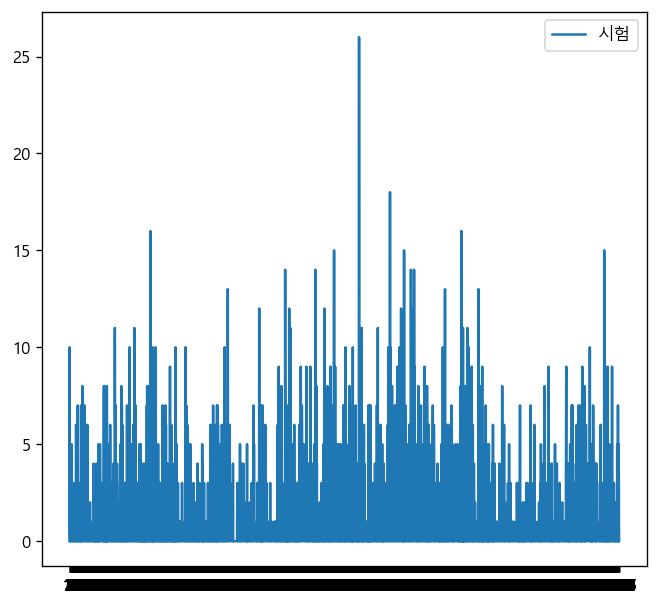

In [24]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
    
targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['시험']))
    
#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '시험')
plt.legend()
plt.show()

In [25]:
# 스트립 플롯 그리기
def dataRefinedForPlot(matrix, xIndex, listWords):
    import pandas as pd
    freq = []
    words = []
    for eachWord in listWords:
        for i in range(0,len(xIndex)):
            freq.append(int(matrix[str(i)][eachWord]))
            words.append(eachWord)
    refinedDF = pd.DataFrame({'words':words,'freq':freq})
    return refinedDF
  
inputDF = dataRefinedForPlot(corpus_tfidf_out, documentIndex, targetWords)

#스트립플롯은 데이터를 점으로 찍어 나타낸 그래프이다
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})


sns.stripplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

In [26]:
#바이올릿 차트
sns.violinplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

<Axes: xlabel='words', ylabel='freq'>

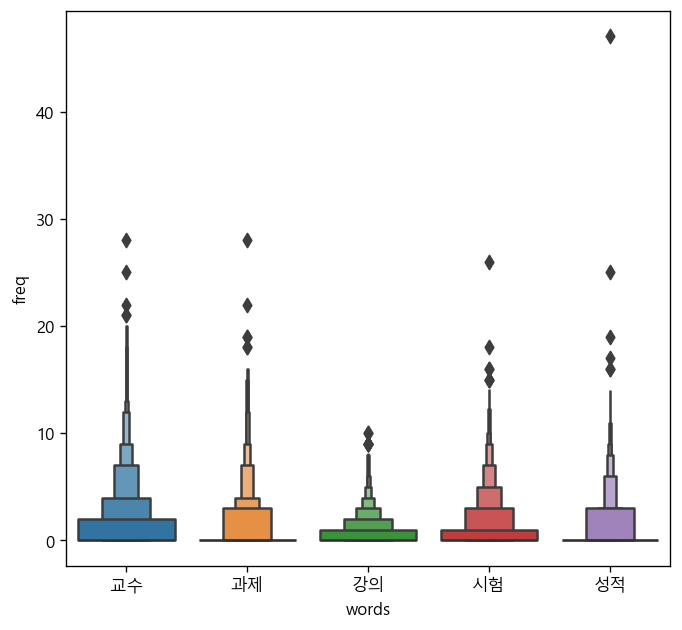

In [27]:
#박슨 플롯
sns.boxenplot(x='words', y='freq', data=inputDF)

# 7. 문서별로 온톨로지 정보 확인하기 (e.g., 영화별로 감정 트랜드 확인하기)

In [88]:
emotions = ['감동', '공포', '권태', '놀람', '분노', '불안', '사랑', '설렘', '섭섭', '성취', '수치', '슬픔', '심란', '연민', '열정', '우울', '재미', '정', '죄책', '질투', '평안', '행복', '혐오']
movies = ["도둑들","26년","광해왕이된남자","설국열차","신세계","은밀하게위대하게"]

movieDic = dict()

#도둑들-Thieves
Thieves_tfidf_matrix = pd.read_csv('./data/tfidf_도둑들_out.csv', index_col=0)
ThievesEmotionMean = []
for i in range(0, len(emotions)):
    ThievesEmotionMean.append(Thieves_tfidf_matrix.loc[emotions[i]].mean())
print(ThievesEmotionMean)
movieDic["도둑들"] = ThievesEmotionMean

#26년-years26
years26_tfidf_matrix = pd.read_csv('./data/tfidf_26년_out.csv', index_col=0)
years26EmotionMean = []
for i in range(0, len(emotions)):
    years26EmotionMean.append(years26_tfidf_matrix.loc[emotions[i]].mean())
print(years26EmotionMean)
movieDic["26년"] = years26EmotionMean

#광해왕이된남자-Gwanghea
Gwanghea_tfidf_matrix = pd.read_csv('./data/tfidf_광해왕이된남자_out.csv', index_col=0)
GwangheaEmotionMean = []
for i in range(0, len(emotions)):
    GwangheaEmotionMean.append(Gwanghea_tfidf_matrix.loc[emotions[i]].mean())
print(GwangheaEmotionMean)
movieDic["광해왕이된남자"] = GwangheaEmotionMean

#설국열차-SnowTrain
SnowTrain_tfidf_matrix = pd.read_csv('./data/tfidf_설국열차_out.csv', index_col=0)
SnowTrainEmotionMean = []
for i in range(0, len(emotions)):
    SnowTrainEmotionMean.append(SnowTrain_tfidf_matrix.loc[emotions[i]].mean())
print(SnowTrainEmotionMean)
movieDic["설국열차"] = SnowTrainEmotionMean

#신세계-NewWorld
NewWorld_tfidf_matrix = pd.read_csv('./data/tfidf_신세계_out.csv', index_col=0)
NewWorldEmotionMean = []
for i in range(0, len(emotions)):
    NewWorldEmotionMean.append(NewWorld_tfidf_matrix.loc[emotions[i]].mean())
print(NewWorldEmotionMean)
movieDic["신세계"] = NewWorldEmotionMean

#은밀하게위대하게-Secret
Secret_tfidf_matrix = pd.read_csv('./data/tfidf_은밀하게위대하게_out.csv', index_col=0)
SecretEmotionMean = []
for i in range(0, len(emotions)):
    SecretEmotionMean.append(Secret_tfidf_matrix.loc[emotions[i]].mean())
print(SecretEmotionMean)
movieDic["은밀하게위대하게"] = SecretEmotionMean

movieDF = pd.DataFrame(movieDic, index=emotions)
print(movieDF)

[0.08898815052536746, 0.09785228949442779, 0.13003818703880282, 0.0646568466024552, 0.14723235940063126, 0.19329295635525007, 0.10507472149805437, 0.25855419863522877, 0.19677527804324194, 0.14141601870553044, 0.03498339030464012, 0.12585831461587374, 0.06565464705104353, 0.032374006927604, 0.2536760054261559, 0.05164360763802466, 0.3574917525274473, 0.09983985108944045, 0.02828445283556656, 0.020052917071456892, 0.1982722977056117, 0.1758364583783988, 0.5365237375362625]
[0.12639341709845728, 0.1289422955582759, 0.1310412605188345, 0.0555045269638214, 0.24679186000533546, 0.2155644791476028, 0.0967313416176401, 0.0678297559654046, 0.14766641659479468, 0.27520538640926084, 0.17775159628298243, 0.154898266212246, 0.11382337109434358, 0.05072240342016643, 0.2722801264529046, 0.04851307938120664, 0.21267570067200303, 0.21897284189018953, 0.03627952401031298, 0.02759041680364004, 0.1314747848411578, 0.15285446991381837, 0.5731144036209319]
[0.3183774603673546, 0.09660054723009456, 0.096792

In [89]:
#히트맵로 표현하기
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.family':'NanumBarunGothic'})
# plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

plt.figure(figsize=(23, 6))
sns.heatmap(movieDF, annot=True)
plt.show()

# 8.네트워크 시각화 생성하기

In [42]:
!pip install pyvis

                                              0.0/756.0 kB ? eta -:--:--
     ------------                           256.0/756.0 kB 7.9 MB/s eta 0:00:01
     --------------------------             532.5/756.0 kB 6.7 MB/s eta 0:00:01
     -------------------------------------  747.5/756.0 kB 6.8 MB/s eta 0:00:01
     -------------------------------------- 756.0/756.0 kB 6.0 MB/s eta 0:00:00
                                              0.0/40.5 kB ? eta -:--:--
     ---------------------------------------- 40.5/40.5 kB ? eta 0:00:00
                                              0.0/2.1 MB ? eta -:--:--
     ---                                      0.2/2.1 MB 4.1 MB/s eta 0:00:01
     ---------                                0.5/2.1 MB 5.2 MB/s eta 0:00:01
     ---------------                          0.8/2.1 MB 5.4 MB/s eta 0:00:01
     --------------------                     1.1/2.1 MB 5.6 MB/s eta 0:00:01
     -------------------------                1.3/2.1 MB 6.0 MB/s eta 0:00:01
 

## 네트워크 데이터 만들기
- https://wikidocs.net/24603

## 코사인 유사도(Cosine Similarity)
- Dan Jurafsky: https://web.stanford.edu/~jurafsky/
- CS124(From Languages to Information): https://www.youtube.com/channel/UC_48v322owNVtORXuMeRmpA
- (2:30): https://www.youtube.com/watch?v=-_i9Cg81rXA&list=PLaZQkZp6WhWxIvz74aEvvVc99o7WuOoQ6&index=4

In [90]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

movies = ["도둑들","26년","광해왕이된남자","설국열차","신세계","은밀하게위대하게"]

sourceList = []
targetList = []
scoreList = []
for i in range(0,len(movies)):
    for j in range(0,len(movies)):
        source = np.array(list(movieDF.loc[:,movies[i]]))
        target = np.array(list(movieDF.loc[:,movies[j]]))
        score = cos_sim(source, target)
        if 0.95 <= score:
            if movies[i] != movies[j]:
                sourceList.append(movies[i])
                targetList.append(movies[j])
                scoreList.append(score)
            
movieNetwork = pd.DataFrame({'source':sourceList, 'target':targetList, 'score':scoreList})
movieNetwork.to_csv("./data/movieNetwork.csv")  
print(movieNetwork)

      source    target     score
0        도둑들      설국열차  0.969219
1        도둑들       신세계  0.963299
2        도둑들  은밀하게위대하게  0.974567
3        26년      설국열차  0.954324
4        26년       신세계  0.954576
5    광해왕이된남자       신세계  0.965345
6    광해왕이된남자  은밀하게위대하게  0.983854
7       설국열차       도둑들  0.969219
8       설국열차       26년  0.954324
9       설국열차       신세계  0.963917
10      설국열차  은밀하게위대하게  0.966536
11       신세계       도둑들  0.963299
12       신세계       26년  0.954576
13       신세계   광해왕이된남자  0.965345
14       신세계      설국열차  0.963917
15       신세계  은밀하게위대하게  0.968000
16  은밀하게위대하게       도둑들  0.974567
17  은밀하게위대하게   광해왕이된남자  0.983854
18  은밀하게위대하게      설국열차  0.966536
19  은밀하게위대하게       신세계  0.968000


In [91]:
#선택과 필터 적용하기
from pyvis.network import Network

net = Network(notebook=True, cdn_resources="remote", bgcolor="#151417", font_color="#F0EDF6", width="100%", select_menu=True, filter_menu=True)

#각 열의 데이터를 숫자 나열로 변환 ex) 2839 2309 0 2088 1319 1741 3460 1029 3332
nodes = list(set([*movieNetwork.source, *movieNetwork.target]))
#텍스트파일에 존재하는 관계 데이터를 중첩 리스트 형태로 변환 ex) [[2839, 3064], [2309, 2590]]
edges = movieNetwork.values.tolist()

net.add_nodes(nodes)
net.add_edges(edges)
net.show("movieNetwork.html")

movieNetwork.html
